In [1]:
#!/usr/bin/python3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import random
import pdb
import re
import glob
from sklearn.decomposition import NMF


In [2]:

def file2Spectra(path):
    #Open and read file
    logfile =  open(path, 'r')
    logtest = logfile.read()
    logfile.close()
    # Find Frequencies with diceimal digits
    freqstri =re.findall('Frequencies\D*(\d+.\d+)\D*(\d+.\d+)\D*(\d+.\d+)',logtest) #looking for decimal numbers and spaces
    IRIntenstri =re.findall('IR Inten\D*(\d+.\d+)\D*(\d+.\d+)\D*(\d+.\d+)',logtest)
    IrDict =[]
    for freqTuple,intTuple in zip(freqstri,IRIntenstri):
        for n,p in zip(freqTuple,intTuple):
            IrDict.append( [float(n), float(p)])
    
    Irs = np.array(IrDict)
    #normalize
    Irs[:,1] = 100*Irs[:,1]/np.amax(Irs[:,1])
    return Irs
# =============================================================================
# for Plotting
#     plt.vlines(Irs[:,0],0,Irs[:,1])
#     plt.xlabel("Wavenumber cm^-1")
#     plt.ylabel("Intensity %")
#     plt.gca().invert_yaxis() 
#     plt.gca().invert_xaxis() 

In [56]:
def nmfMatcher(OG_spectra,Calc_spectra):
    #pdb.set_trace() 
        #print(len(OG_spectra))
    #OG_spectra = np.transpose(OG_spectra)
    mindim = np.amin(OG_spectra.shape)
    errorTable = np.zeros((mindim,mindim))
    for n in range (mindim):
         for p in range(mindim):
                 errorTable[n,p] += np.sum(abs( OG_spectra[n] - Calc_spectra[p]))
    #print("hi \n", errorTable)
    print(errorTable)
    matchTable=np.zeros((mindim,mindim))
    #print("errorTable \n \n",errorTable)
    for entry in range(mindim):
         Match = np.where(np.amin(errorTable) == errorTable)
         matchTable[entry] =  Match
         x = Match[0]
         y = Match[1]
         #print(Match, errorTable[Match])
         errorTable[x]=10**12
        # errorTable[1,y]=10**12
         print(errorTable)
         #print(errorTable)
    return matchTable

In [57]:
a =np.array ([[1,2,3], [60,70,65]])
b =np.array([[50,90,65],[.5,6,1]])
print(nmfMatcher(a,b))

[[199.    6.5]
 [ 30.  187.5]]
[[1.000e+12 1.000e+12]
 [3.000e+01 1.875e+02]]
[[1.e+12 1.e+12]
 [1.e+12 1.e+12]]
[[0. 1.]
 [1. 0.]]


<ipython-input-56-747f3f52bfb3>:16: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  matchTable[entry] =  Match


In [58]:
def IrPlotter(item,title):
    plt.plot(np.linspace(0,1000,len(item)),item,markersize=.1)
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.xlabel("cm^-1")
    plt.show()
    plt.clf()
    

True


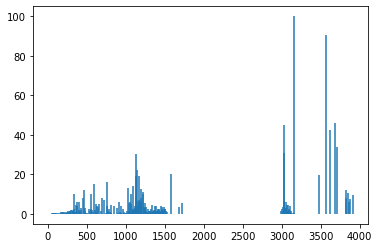

In [59]:
fileList = glob.glob('Tri_A1*/Tri_A1*/input.log')

print(isinstance(fileList[0],str))
plt.vlines(file2Spectra(fileList[1])[:,0],0,file2Spectra(fileList[0])[:,1])

In [60]:
def VertPlotParamaters():
    plt.xlabel("Wavenumber cm^-1")
    plt.ylabel("Intensity %")
    plt.gca().invert_yaxis() 
    plt.gca().invert_xaxis()
    plt.show()
    plt.clf()
    

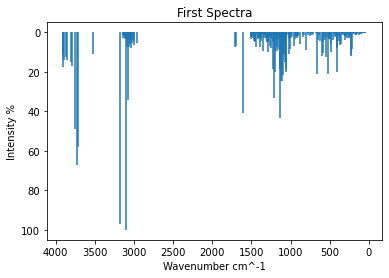

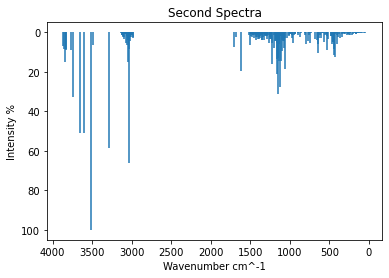

492


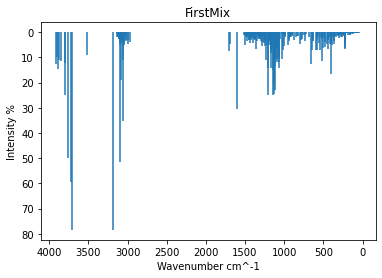

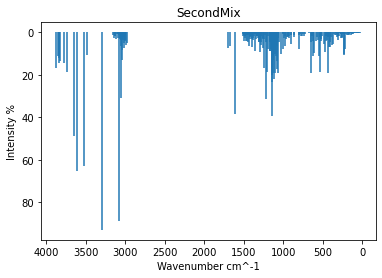

C:\Users\Abner\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\Abner\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
<ipython-input-56-747f3f52bfb3>:16: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  matchTable[entry] =  Match


size (492, 2)
[[1.91330892e+02 1.19410110e-02]
 [0.00000000e+00 1.89179637e+01]]
Hi (492, 2) (492, 2)
[[8.64170360e-07 2.13103727e+01]
 [2.13103752e+01 1.64467895e-06]]
[[1.00000000e+12 1.00000000e+12]
 [2.13103752e+01 1.64467895e-06]]
[[1.e+12 1.e+12]
 [1.e+12 1.e+12]]
[[0. 0.]
 [1. 1.]]


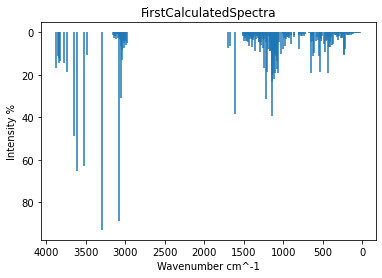

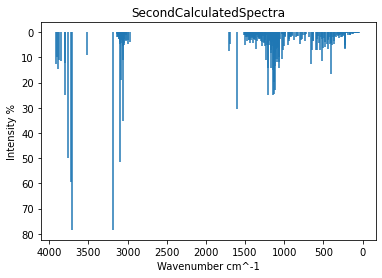

<Figure size 432x288 with 0 Axes>

In [72]:
def nmf2TesterMix():
    #pdb.set_trace()

    fraction1 = random.random()
    fraction2 =  random.random()
    #print(f'The expected fractions are  {fraction1:.3}, {fraction2:.3}.')
    
    #Creating Two Spectra
    IR0 =random.choice(fileList)
    IR0 = file2Spectra(IR0)
   
    IR1 =random.choice(fileList)
    IR1 = file2Spectra(IR1)
   # for n,p in zip(IR0[:,0],IR1[:,0]) :
    #    print (n,p)
    
    plt.vlines(IR0[:,0],0,IR0[:,1])
    plt.xlabel("Wavenumber cm^-1")
    plt.ylabel("Intensity %")
    plt.title('First Spectra')
    plt.gca().invert_yaxis() 
    plt.gca().invert_xaxis()
    plt.show()
    plt.clf()
    
    plt.vlines(IR1[:,0],0,IR1[:,1])
    plt.xlabel("Wavenumber cm^-1")
    plt.ylabel("Intensity %")
    plt.title('Second Spectra')
    plt.gca().invert_yaxis() 
    plt.gca().invert_xaxis()
    plt.show()
    plt.clf()
    
    numPoints = len(IR0[:,0])
    
    
    
    
    IRF = np.zeros((2,numPoints *2))
    IRF[0,:] = np.ravel([IR0[:,0],IR1[:,0]])
    IRF[1,:] = np.ravel([IR0[:,1] *fraction1 + IR1[:,1]*(1-fraction1),IR0[:,1] *fraction2 + IR1[:,1]*(1-fraction2)])
    print (IRF.shape[1])
    nmfMatcher
    #First Mix
    plt.vlines(IRF[0,:int(IRF.shape[1]/2)],0,IRF[1,:int(IRF.shape[1]/2)])
    plt.title("FirstMix")
    VertPlotParamaters()
    #Second Mix
    plt.vlines(IRF[0,int(IRF.shape[1]/2):],0,IRF[1,int(IRF.shape[1]/2):])
    plt.title("SecondMix")
    VertPlotParamaters()
    #print(IRF)
    
    #IRF[1,:,1] =  IR1[:,0]
 
    
    IRF= np.transpose(IRF)
    
    model = NMF(n_components=2, max_iter=1000, tol= 1*10**-8, solver= 'cd')
    W = model.fit_transform(IRF)
    H = model.components_
    product = np.matmul(W,H)
    print("size", product.shape)
    print(H)
    print("Hi", W.shape, IRF.shape)
    print(nmfMatcher (IRF, product))
    plt.vlines(product[int(W.shape[0]/2):,0],0,product[int(W.shape[0]/2):,1])
    plt.title('FirstCalculatedSpectra')
    VertPlotParamaters()
    plt.vlines(product[:int(W.shape[0]/2),0],0,product[:int(W.shape[0]/2),1])
    plt.title('SecondCalculatedSpectra')
    VertPlotParamaters()
   #print(W[:,0])
    
   
nmf2TesterMix()

In [8]:
    
  
    
    IROG = np.array([IR0,IR1],dtype='object')
    print("IROG shape", IROG.shape)
    #IrPlotter(IR1,"SecondPlot")
   
    
    
    IrMix = np.zeros((4,numPoints))
    IrMix[0,:]=IRF[0,:]
    IrMix[1,:]=IRF[1,:]
   
    #IrMix[3,:] = IR0*fraction1 + IR1*(1-fraction1)
    
    IRF= np.transpose(IRF)
    #IrMix[3,:] = IR0*(1-fraction2)  + IR1*fraction1
   # IrPlotter( IrMix[0,:],"FirstMix")
   # IrPlotter(IrMix[1,:],"SecondMix")
    IrMix= np.transpose(IrMix)
    #model  = NMF(n_components=2, init='nndsvda', max_iter=1000, tol= 1*10**-6, solver='mu')
    #print(model)
    #
   # Wbaby = model.fit_transform(IrMix)
    #Hbaby = model.components_
    model = NMF(n_components=2, max_iter=10000, tol= 1*10**-8, solver= 'cd')#, init='custom')
    #it seems that mu gives more close results
    #must analyze errors and create plots
    W = model.fit_transform(IrMix)
    H = model.components_
    HO = H.copy()
    print ("H", HO)
    
    H = np.apply_along_axis(lambda l :l/np.amax(l) ,1,H)
    print ("H adjusted", H)
    #print(H)
    IrPlotter(W[:,0], "First Calc Spectra")
    IrPlotter(W[:,1], "Second Calc Spectra")
    #print (np.mean(np.where(W[:,1]>0))/np.mean((np.where(W[:,0]>0)))
    #print(model.fit(IrMix))
    W2 = np.matmul(W,H)

# =============================================================================
    for entri in nmfMatcher(IROG,W):
        
         print('entri', entri)
         plt.plot(np.linspace(0,1000,numPoints),IROG[entri[0][0],:],color="red")
         if H[0,0]>.01:
             print(f'The calculated fraction of the first is {H[0,2]:.5}.')
             print(f'The calculated fraction of the second is {H[1,2]:.5}.')
             

             
         else:
             print(f'The calculated fraction of the first is {H[1,2]:.5}')
             print(f'The calculated fraction of the second is, {H[0,2]:.5}.')
             
         plt.plot(np.linspace(0,1000,numPoints),(W[:,entri[1][0]])*(max(HO[entri[1][0]])))
        # print("full", (max(HO[entri[0][0]])))
        


         plt.gca().invert_yaxis()
         plt.legend(["Original", "Calculated"])
         plt.title(str(entri[0][0])+ " Both Spectra")
         plt.xlabel("cm^-1")
         plt.show()
         plt.clf()
         


NameError: name 'IR0' is not defined